In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import tensorflow as tf

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

/bin/sh: 1: google-drive-ocamlfuse: not found


In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image, sequence
from keras.applications import VGG16
from keras.layers import Dense, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector, Merge
from keras.models import Sequential, Model
from keras.optimizers import Nadam

Using TensorFlow backend.


In [0]:
run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)

In [6]:
image_path = "data/image_dataset/Flicker8k_Dataset/"
directory = os.listdir(image_path)
captions = open('F:\\image_dataset\\testing\\Flickr8k.token.txt', 'r').read().split('\n')
x_train = open('F:\\image_dataset\\testing\\Flickr_8k.trainImages.txt', 'r').read().split("\n")
x_test = open('F:\\image_dataset\\testing\\Flickr_8k.testImages.txt', 'r').read().split("\n")

FileNotFoundError: ignored

In [0]:
mapping = dict()

for caption in range(len(captions)):
    token = captions[caption].split('#')
    if len(token)<2:
        continue
    image_id, image_desc = token[0], token[1:]
    image_id = image_id.split('.')[0]
    image_id = image_id+'.jpg'
    image_desc = ' '.join(image_desc)
    if image_id not in mapping:
            mapping[image_id] = list()
    mapping[image_id].append(image_desc)

In [0]:
len(mapping)

8092

In [0]:
temp = captions[100].split('.')
temp[0]

'1024138940_f1fefbdce1'

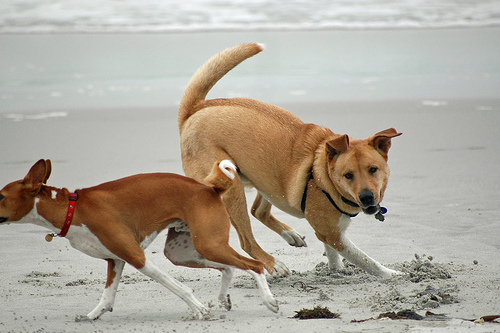

0	Two different breeds of brown and white dogs play on the beach .
1	Two dogs are making a turn on a soft sand beach .
2	Two dogs playing in the sand at the beach .
3	Two dogs playing together on a beach .
4	Two large tan dogs play along a sandy beach .


In [0]:
from IPython.display import Image, display
z = Image(filename=image_path+ temp[0]+'.jpg')
display(z)

for i in range(len(mapping[temp[0]+'.jpg'])):
    print(mapping[temp[0]+'.jpg'][i])

In [0]:
model1 = VGG16(weights='imagenet',include_top=True, input_shape=(224,224,3))

ResourceExhaustedError: OOM when allocating tensor with shape[25088,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: fc1_3/kernel/Assign = Assign[T=DT_FLOAT, _class=["loc:@fc1_3/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](fc1_3/kernel, fc1_3/random_uniform)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'fc1_3/kernel/Assign', defined at:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-5b42af31c903>", line 1, in <module>
    model1 = VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels.h5')
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\applications\vgg16.py", line 146, in VGG16
    x = Dense(4096, activation='relu', name='fc1')(x)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\topology.py", line 592, in __call__
    self.build(input_shapes[0])
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\layers\core.py", line 842, in build
    constraint=self.kernel_constraint)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\topology.py", line 416, in add_weight
    constraint=constraint)
  File "C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 395, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 235, in __init__
    constraint=constraint)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 381, in _init_from_args
    validate_shape=validate_shape).op
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\state_ops.py", line 281, in assign
    validate_shape=validate_shape)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 64, in assign
    use_locking=use_locking, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3290, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[25088,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: fc1_3/kernel/Assign = Assign[T=DT_FLOAT, _class=["loc:@fc1_3/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](fc1_3/kernel, fc1_3/random_uniform)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [0]:
def preprocess_input(img):
    img = img[:, :, :, ::-1] #RGB to BGR
    img[:, :, :, 0] -= 103.939 
    img[:, :, :, 1] -= 116.779
    img[:, :, :, 2] -= 123.68
    return img

In [0]:
def preprocessing(img_path):
    im = load_img(img_path, target_size=(224,224,3))
    im = img_to_array(im)
    im = np.expand_dims(im, axis=0)
    im = preprocess_input(im)
    return im

In [0]:
def get_encoding(model, img):
    image = preprocessing(image_path+img)
    pred = model.predict(image)
    pred = np.reshape(pred, pred.shape[1])
    return pred

In [0]:
img_id = mapping.keys()

In [0]:
train_img_id = pd.read_csv('F:\\image_dataset\\testing\\Flickr_8k.trainImages.txt',header=None)

In [0]:
train_dataset = open('F:\\image_dataset\\train_datasets.txt','w')

In [0]:
train_dataset.write("image_id\tcaptions\n")

18

In [0]:
test_encoded_images = {}
train_encoded_images = {}

In [0]:
c_train = 0
for img in train_img_id[0]:
    train_encoded_images[img] = get_encoding(model1,img)
    for capt in mapping[img]:
        caption = "<start> "+ capt.split('\t')[1] + " <end>"
        train_dataset.write(img+"\t"+caption+"\n")
        train_dataset.flush()
        c_train += 1
train_dataset.close()

In [0]:
test_img_id = pd.read_csv('F:\\image_dataset\\testing\\Flickr_8k.testImages.txt',header=None)
test_dataset = open('F:\\image_dataset\\test_datasets.txt','w')
test_dataset.write("image_id\tcaptions\n")
c_test = 0
for img in test_img_id[0]:
    test_encoded_images[img] = get_encoding(model1,img)
    for capt in mapping[img]:
        caption = "<start> "+ capt.split('\t')[1] + " <end>"
        test_dataset.write(img+"\t"+caption+"\n")
        test_dataset.flush()
        c_test += 1
test_dataset.close()

In [0]:
with open( "train_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(train_encoded_images, pickle_f )  
    
with open( "test_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(test_encoded_images, pickle_f )

NameError: name 'train_encoded_images' is not defined

In [0]:
pd_dataset = pd.read_csv('F:\\image_dataset\\train_datasets.txt', delimiter='\t')
ds = pd_dataset.values

In [0]:
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print(len(sentences))

30000


In [0]:
words = [i.split() for i in sentences]
print(words[0])
print(len(words))

['<start>', 'A', 'black', 'dog', 'is', 'running', 'after', 'a', 'white', 'dog', 'in', 'the', 'snow', '.', '<end>']
30000


In [0]:
unique = []
for i in words:
    unique.extend(i)

In [0]:
print (unique[:3])

['<start>', 'A', 'black']


In [0]:
unique = list(set(unique))
vocab_size = len(unique)

In [0]:
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [0]:
max_len = 0

for i in sentences:
    i = i.split()
    if len(i) > max_len:
        max_len = len(i)

print( max_len)

40


In [0]:
padded_sequences, subsequent_words = [], []

for ix in range(ds.shape[0]):
    partial_seqs = []
    next_words = []
    text = ds[ix, 1].split()
    text = [word_2_indices[i] for i in text]
    for i in range(1, len(text)):
        partial_seqs.append(text[:i])
        next_words.append(text[i])
    padded_partial_seqs = sequence.pad_sequences(partial_seqs, max_len, padding='post')

    next_words_1hot = np.zeros([len(next_words), vocab_size], dtype=np.bool)
    
    #Vectorization
    for i,next_word in enumerate(next_words):
        next_words_1hot[i, next_word] = 1
        
    padded_sequences.append(padded_partial_seqs)
    subsequent_words.append(next_words_1hot)
    
padded_sequences = np.asarray(padded_sequences)
subsequent_words = np.asarray(subsequent_words)

print (padded_sequences.shape)
print (subsequent_words.shape)

(30000,)
(30000,)


In [0]:
padded_sequences[0]

array([[7918,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [7918, 4402,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [7918, 4402,  940,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [7918, 4402,  940, 6795,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  

In [0]:
for ix in range(len(padded_sequences[0])):
    for iy in range(max_len):
        print (indices_2_word[padded_sequences[0][ix][iy]],end=" ")
    print('\n')
print (len(padded_sequences[0]))

<start> chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing 

<start> A chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing 

<start> A black chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing chasseing ch

In [0]:
with open('./train_encoded_images.p', 'rb') as f:
        encoded_images = pickle.load(f)

EOFError: Ran out of input

In [0]:
imgs = []

for ix in range(ds.shape[0]):
    imgs.append(encoded_images[ds[ix, 0]])

imgs = np.asarray(imgs)
print( imgs.shape)

NameError: name 'encoded_images' is not defined

In [0]:
number_of_images = 1500
captions = np.zeros([0, max_len])
next_words = np.zeros([0, vocab_size])

for ix in range(number_of_images):#img_to_padded_seqs.shape[0]):
    captions = np.concatenate([captions, padded_sequences[ix]])
    next_words = np.concatenate([next_words, subsequent_words[ix]])

np.save("F:\\image_dataset\\captions.npy", captions)
np.save("F:\\image_dataset\\next_words.npy", next_words)

print (captions.shape)
print (next_words.shape)

(19136, 40)
(19136, 8255)


In [0]:
images = []

for ix in range(number_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        images.append(imgs[ix])
        
images = np.asarray(images)

np.save("F:\\image_dataset\\images.npy", images)

print (images.shape)

(19136, 4096)


In [0]:
image_names = []

for ix in range(number_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        image_names.append(ds[ix, 0])
        
image_names = np.asarray(image_names)

np.save("F:\\image_dataset\\image_names.npy", image_names)

print (len(image_names))

19136


In [0]:
captions = np.load("F:\\image_dataset\\captions.npy")
next_words = np.load("F:\\image_dataset\\next_words.npy")

print (captions.shape)
print( next_words.shape)

(19136, 40)
(19136, 8255)


In [0]:
images = np.load("F:\\image_dataset\\images.npy")

print (images.shape)

(19136, 4096)


In [0]:
image_names = np.load("F:\\image_dataset\\image_names.npy")
        
print (len(image_names))

19136


In [0]:
embedding_size = 64

In [0]:
image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(4096,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                262208    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 40, 64)            0         
Total params: 262,208
Trainable params: 262,208
Non-trainable params: 0
_________________________________________________________________


In [0]:
language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 64)            528320    
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 256)           328704    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 40, 64)            16448     
Total params: 873,472
Trainable params: 873,472
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = Sequential()

model.add(Merge([image_model, language_model], mode='concat', concat_axis=-1))
model.add(LSTM(1000, return_sequences=False))
model.add(Dense(vocab_size))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Nadam(), metrics=['accuracy'],options = run_opts)
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 40, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1000)              4516000   
_________________________________________________________________
dense_3 (Dense)              (None, 8255)              8263255   
_________________________________________________________________
activation_1 (Activation)    (None, 8255)              0         
Total params: 13,914,935
Trainable params: 13,914,935
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit([images, captions], next_words, batch_size=512, epochs=10)

Epoch 1/10
